# Import

In [1]:
# import typing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import QuantLib as ql
import yfinance as yf
# import pandas_market_calendars as mcal
# import datetime
# import time
# from pathlib import Path
# import os

# Code

In [51]:
hist_start = pd.to_datetime('2023-08-09') # Historical start date
hist_end = pd.to_datetime('2023-12-14')
# Define the ticker list
ticker_list = ['BA']

# Fetch the data
dl_data = yf.download(ticker_list, start=hist_start, end=hist_end) # Auto adjust is false


[*********************100%%**********************]  1 of 1 completed


In [52]:
data = dl_data['Adj Close']
data = pd.DataFrame(data)
data = data.rename(columns={'Adj Close': 'BA'})
display(data.isna().sum())
data.index = pd.to_datetime(data.index)
display(data.tail(20))



BA    0
dtype: int64

,BA
Date,
2023-11-15,208.710007
2023-11-16,206.600006
2023-11-17,208.039993
2023-11-20,217.710007
2023-11-21,218.270004
2023-11-22,219.910004
2023-11-24,220.000000
2023-11-27,219.300003
2023-11-28,222.369995


In [ ]:
boeing = yf.Ticker('BA')
boeing.news

# yfinance doesn't provide a lot of news

- Assumption
    - Uses all historical data to calculate the drift and standard deviation

In [53]:
# Calculate log returns for the entire dataframe
log_returns = np.log(data / data.shift(1))

# Drop NaN values from log returns
log_returns.dropna(inplace=True)

display(log_returns)

# Calculate the drift
BA_mu = np.mean(log_returns)

# Calculate the volatility (standard deviation of log returns), returns a series
BA_vol =  np.std(log_returns)['BA']


display(data)
print(f"BA_mu, BA_vol: {BA_mu}, {BA_vol}")

,BA
Date,
2023-08-10,0.001680
2023-08-11,-0.010718
2023-08-14,0.004191
2023-08-15,-0.018978
2023-08-16,-0.009996
...,...
2023-12-07,0.001856
2023-12-08,0.030581
2023-12-11,0.013718


/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,BA
Date,
2023-08-09,237.860001
2023-08-10,238.259995
2023-08-11,235.720001
2023-08-14,236.710007
2023-08-15,232.259995
...,...
2023-12-07,237.330002
2023-12-08,244.699997
2023-12-11,248.080002


BA_mu, BA_vol: 0.0006069551798280284, 0.015692727101414856


- Assumption
    - Never take out holidays
    - Assumed interest rate is 0.0175

,0,1,2,3,4,5,6,7,8,9
0,250.910004,250.910004,250.910004,250.910004,250.910004,250.910004,250.910004,250.910004,250.910004,250.910004
1,250.634358,250.920199,250.953087,250.649377,250.792501,251.013170,250.919924,251.433126,250.726098,250.970674
2,250.654096,250.735714,250.616996,251.326379,250.975581,250.982591,250.763255,251.262329,251.072924,250.971040
3,250.970868,250.654127,250.899322,251.036549,250.952668,251.129129,250.701014,251.081567,250.646860,251.056132
4,250.546733,250.319860,250.989735,251.001339,251.055316,251.229231,250.201428,251.077596,250.405128,251.439483
5,250.573153,250.906294,251.111163,250.964452,250.612932,251.624049,250.582157,251.037067,250.562036,251.325589
6,250.687809,251.178160,250.948445,251.213311,250.767441,251.941291,250.456599,251.440444,250.715691,251.312359
7,250.657728,251.515687,251.491327,251.442341,250.756795,252.009902,250.373296,251.636977,250.672071,251.178950
8,251.001359,251.154582,251.311629,251.567787,250.857116,251.960380,250.370941,252.161192,250.482163,250.971927
9,250.877301,251.282022,251.510772,251.700223,251.227036,251.837730,249.951990,252.563058,250.523138,251.253073


0     250.910004
1     250.901251
2     250.936091
3     250.912824
4     250.826585
5     250.929889
6     251.066155
7     251.173507
8     251.183908
9     251.272634
10    251.226854
11    251.146178
12    251.165731
13    251.117621
14    251.231999
15    251.117017
16    251.057727
17    250.897704
18    250.817085
19    250.818836
20    250.677868
21    250.622544
22    250.612374
23    250.629075
24    250.622406
25    250.644721
dtype: float64

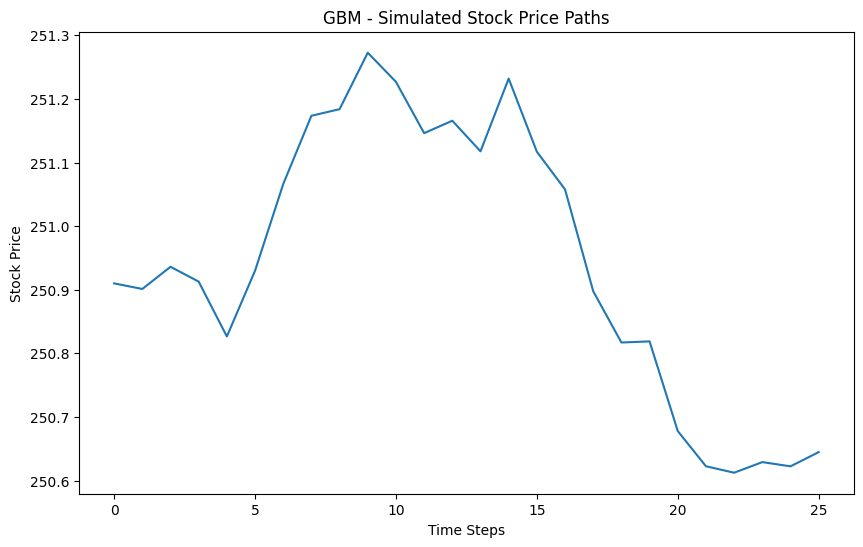

In [109]:
def simulate_gbm(S0, mu, sigma, T, dt, N):
    """
    Simulate stock prices using Geometric Brownian Motion.
    
    Parameters:
    S0 (float): Initial stock price
    mu (float): Expected return
    sigma (float): Volatility
    T (float): Time horizon in years
    dt (float): Time step
    N (int): Number of simulations
    
    Returns:
    DataFrame: Simulated stock price paths
    """
    time_steps = int(T / dt)
    stock_paths = np.zeros((time_steps + 1, N))
    stock_paths[0] = S0

    for t in range(1, time_steps + 1):
        Z = np.random.standard_normal(N)
        stock_paths[t] = stock_paths[t - 1] * np.exp((0.0175 - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    return pd.DataFrame(stock_paths)

# GBM parameters (example values, you should estimate these from real data)
S0 = data['BA'].iloc[-1] # Initial stock price
mu = BA_mu # Expected return
sigma = BA_vol # Volatility
T = 0.1 # Time horizon in years
dt = 1/252 # Daily time step
N = 10 # Number of simulations

simulated_data = simulate_gbm(S0, mu, sigma, T, dt, N)
display(simulated_data)

mean_sim_data = np.mean(simulated_data, axis=1)
display(mean_sim_data)
# Plotting the simulated stock price paths
plt.figure(figsize=(10,6))
plt.plot(mean_sim_data)
plt.title('GBM - Simulated Stock Price Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()